In [1]:
#The data consisits of more than 5L records and 45 variables: 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#Earlier having around 5LAC rows, after sampling having around 1.33LAC rows:
df = pd.read_csv("/Users/shailesh/Desktop/00 Python/train_indessa.csv").sample(frac=.25,random_state=0).reset_index()
df = df.drop(["index"],axis=1)

'''1.Data Cleaning'''
#Removing unwanted columns:
df = df.drop(["member_id","funded_amnt","funded_amnt_inv","grade","emp_title","desc","title","verification_status_joint"],axis=1)

df["term"].replace(to_replace=" months", value='', regex=True, inplace=True)
df["term"]=pd.to_numeric(df["term"], errors="coerce")

df["batch_enrolled"].replace(to_replace="BAT", value='', regex=True, inplace=True)
df["batch_enrolled"]=pd.to_numeric(df["batch_enrolled"], errors="coerce")

df["emp_length"].replace("n/a", 0, inplace=True)
df["emp_length"].replace(to_replace="\+ years", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace=" years", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace=" year", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace="< 1", value= 0, regex=True, inplace=True)
df["emp_length"]=pd.to_numeric(df["emp_length"], errors="coerce")

df["verification_status"].replace(to_replace="Source ",value='',regex=True, inplace=True)

df["zip_code"].replace(to_replace="xx", value='', regex=True, inplace=True)
df["zip_code"]=pd.to_numeric(df["zip_code"], errors="coerce")

df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

df["sub_grade"].replace(to_replace="A", value=0, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="B", value=1, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="C", value=2, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="D", value=3, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="E", value=4, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="F", value=5, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="G", value=6, regex=True, inplace=True)
df["sub_grade"]=pd.to_numeric(df["sub_grade"], errors="coerce")

print('Transformation Done')
#shape of dataframe:
print(df.shape)
#dimension of dataframe:
print(df.ndim)

Transformation Done
(133107, 37)
2


In [2]:
#Checking for missing values & deleting columns with more than 50% missing values:
print(df.isnull().sum())
df = df.drop(["mths_since_last_delinq","mths_since_last_record","mths_since_last_major_derog"],axis=1)

loan_amnt                           0
term                                0
batch_enrolled                  47935
int_rate                            0
sub_grade                           0
emp_length                       6708
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
purpose                             0
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         2
inq_last_6mths                      2
mths_since_last_delinq          68269
mths_since_last_record         112589
open_acc                            2
pub_rec                             2
revol_bal                           0
revol_util                         63
total_acc                           2
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries  

In [3]:
#Analysing remaining columns:
details = df.describe()
details

           loan_amnt           term  batch_enrolled       int_rate  \
count  133107.000000  133107.000000    8.517200e+04  133107.000000   
mean    14734.500627      43.182132    3.083128e+06      13.253804   
std      8444.625855      10.990407    1.475532e+06       4.377374   
min       500.000000      36.000000    2.067800e+04       5.320000   
25%      8000.000000      36.000000    1.942645e+06       9.990000   
50%     13000.000000      36.000000    2.803411e+06      12.990000   
75%     20000.000000      60.000000    4.136152e+06      16.200000   
max     35000.000000      60.000000    5.924421e+06      28.990000   

           sub_grade     emp_length    annual_inc       zip_code  \
count  133107.000000  126399.000000  1.331060e+05  133107.000000   
mean        1.800950       6.000411  7.491323e+04     510.978994   
std         1.310877       3.665967  6.477513e+04     313.310715   
min         0.000000       0.000000  1.896000e+03       8.000000   
25%         1.000000       3.

In [4]:
#Deleting the columns which have more than 50% values equal to 0:
df = df.drop(["delinq_2yrs","inq_last_6mths","pub_rec","total_rec_late_fee","recoveries","collection_recovery_fee","collections_12_mths_ex_med","acc_now_delinq","tot_coll_amt"],axis=1)
print(df.shape)

(133107, 25)


In [5]:
#Getting all numeric columns:
df1 = df._get_numeric_data()
df1.head()

,loan_amnt,term,batch_enrolled,int_rate,sub_grade,emp_length,annual_inc,zip_code,dti,open_acc,revol_bal,revol_util,total_acc,total_rec_int,last_week_pay,tot_cur_bal,total_rev_hi_lim,loan_status
0,5000,36,4694572.0,13.66,2,1.0,43000.0,144,11.47,14.0,1782.0,13.9,17.0,553.87,52.0,23756.0,12800.0,0
1,5800,36,5547201.0,14.33,2,2.0,62550.0,927,3.32,8.0,4901.0,30.8,20.0,267.48,22.0,4901.0,15900.0,1
2,6000,36,NaN,9.99,1,NaN,55648.1,484,34.35,7.0,4540.0,69.8,18.0,441.15,44.0,284655.0,6500.0,0
3,16500,60,1780517.0,12.29,2,3.0,50000.0,350,4.08,13.0,425.0,7.9,30.0,812.92,22.0,233143.0,5400.0,0
4,29900,60,2136391.0,17.57,3,5.0,65000.0,477,30.59,14.0,37031.0,75.8,42.0,7798.91,87.0,203017.0,45600.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000DAA802BEB8>,
      dtype=object)

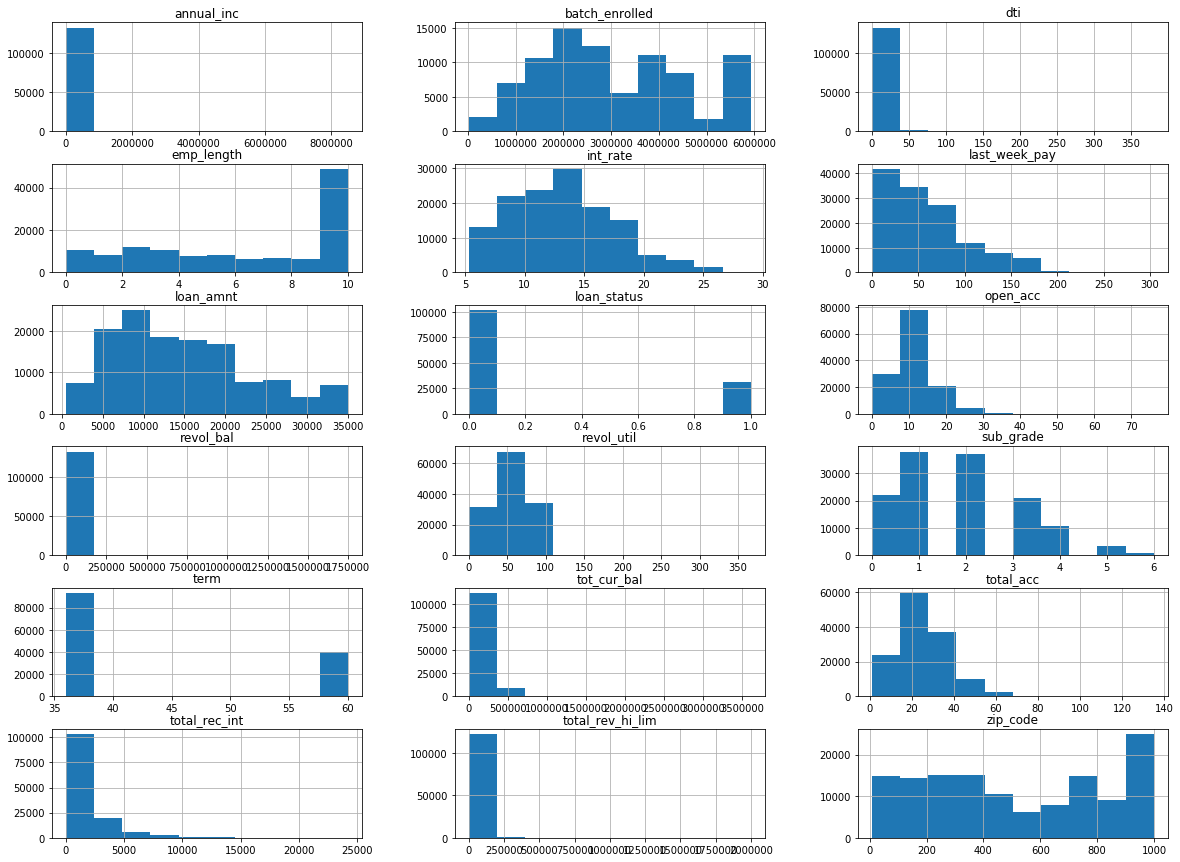

In [6]:
#Plotting histograms for all numeric variables:
hist = df1.hist(bins=10,figsize=(20,15), layout=(6,3))
hist

In [7]:
#Getting categorical variables:
df2 = df.select_dtypes(include=["object"])
df2.head()

,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,RENT,Verified,n,other,NY,w,INDIVIDUAL
1,RENT,Not Verified,n,credit_card,CA,f,INDIVIDUAL
2,MORTGAGE,Verified,n,home_improvement,MI,f,INDIVIDUAL
3,MORTGAGE,Verified,n,debt_consolidation,AL,w,INDIVIDUAL
4,MORTGAGE,Not Verified,n,debt_consolidation,IN,w,INDIVIDUAL


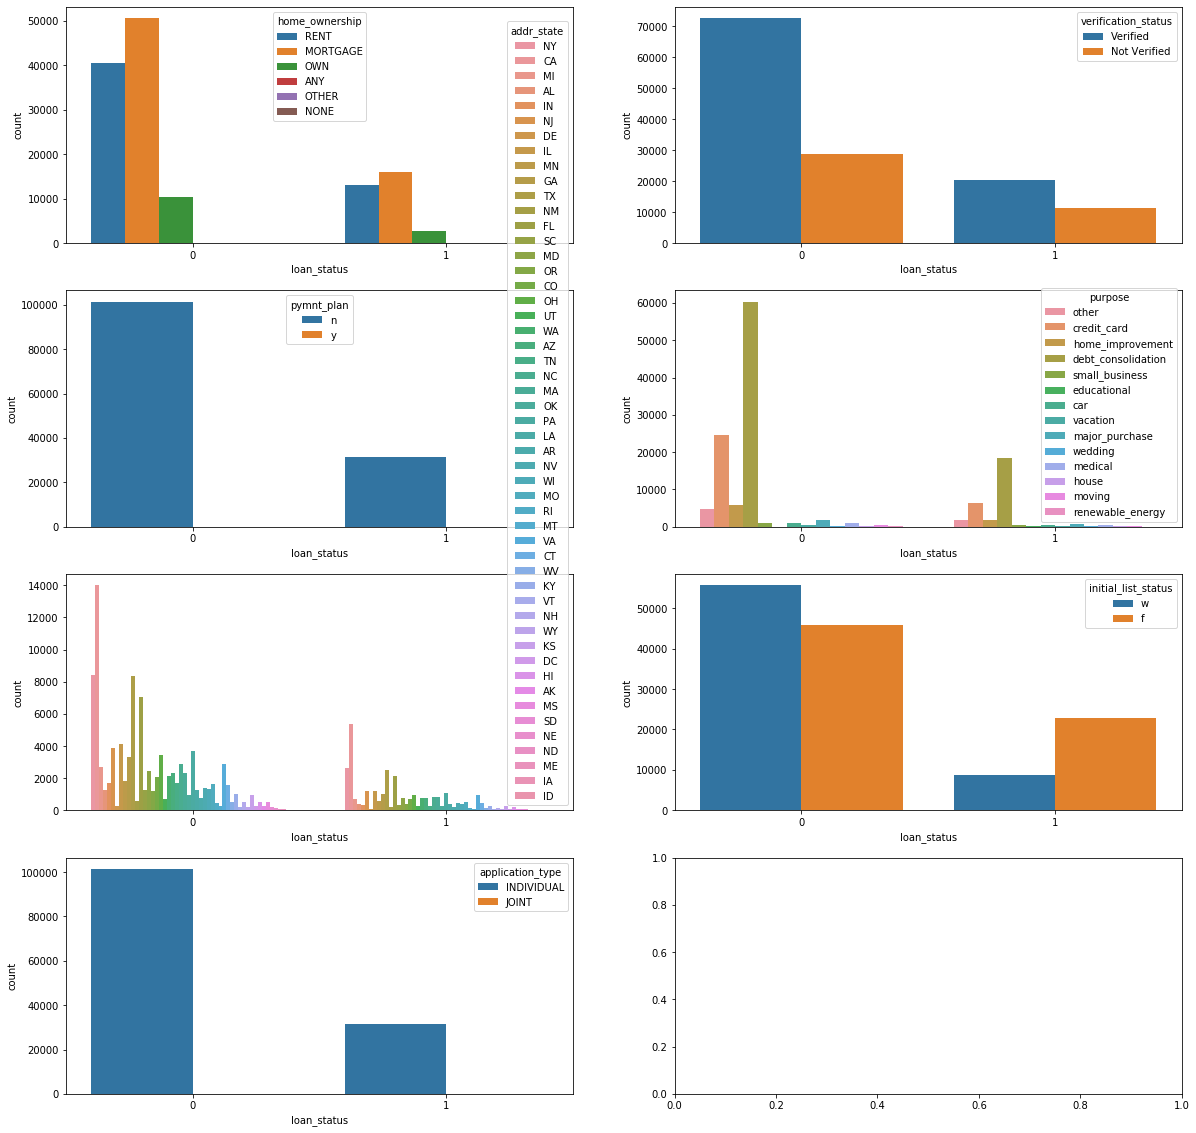

In [8]:
#Plotting of all categorical variables with loan_status (1=Defaulter, 0=Non-Defaulter)
fig , ax = plt.subplots(4,2,figsize=(20,20))
for axi , var in zip(ax.flat,df2):
    sb.countplot(x=df.loan_status,hue=df[var],ax=axi)

In [9]:
#Now checking skewness for all numeric variables before outlier treatment 
#For no skewness, it should range from -1 to +1:
skewness1 = df1.skew()
skewness1

loan_amnt            0.688638
term                 0.876754
batch_enrolled       0.321342
int_rate             0.422738
sub_grade            0.571690
emp_length          -0.239401
annual_inc          44.019122
zip_code             0.055426
dti                  0.847837
open_acc             1.221607
revol_bal           12.529985
revol_util          -0.159788
total_acc            0.865993
total_rec_int        2.842379
last_week_pay        1.021219
tot_cur_bal          2.667196
total_rev_hi_lim     7.046133
loan_status          1.235167
dtype: float64

In [10]:
'''2.Outlier Detection:'''
outlier1 = df1.describe().round(2).T
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outlier2 = np.where((df1 > upper_limit) | (df1 < lower_limit))
new = pd.DataFrame({'IQR':IQR, 'LL': lower_limit,'UL':upper_limit, 'skewness':skewness1})

#creating frame for outlier analysis:
outlier_frame = pd.concat([outlier1, new],axis=1) 
print(outlier_frame)
del details,skewness1,outlier1,Q1,Q3,IQR,new

                     count        mean         std       min         25%  \
loan_amnt         133107.0    14734.50     8444.63    500.00     8000.00   
term              133107.0       43.18       10.99     36.00       36.00   
batch_enrolled     85172.0  3083128.15  1475531.67  20678.00  1942645.00   
int_rate          133107.0       13.25        4.38      5.32        9.99   
sub_grade         133107.0        1.80        1.31      0.00        1.00   
emp_length        126399.0        6.00        3.67      0.00        3.00   
annual_inc        133106.0    74913.23    64775.13   1896.00    45000.00   
zip_code          133107.0      510.98      313.31      8.00      225.00   
dti               133107.0       18.16        8.36      0.00       11.97   
open_acc          133105.0       11.56        5.31      0.00        8.00   
revol_bal         133107.0    16957.97    22185.51      0.00     6464.50   
revol_util        133044.0       55.18       23.78      0.00       37.80   
total_acc   

In [11]:
#Selecting columns for capping and flooring:
X1=df1.iloc[:,[6,9,10,12,13,14,15,16]]
low = lower_limit[[6,9,10,12,13,14,15,16]]
up = upper_limit[[6,9,10,12,13,14,15,16]]
#Flooring and Capping:
X11 = np.where(X1<low, low, X1)
X11 = np.where(X1>up, up, X1)
X11 = pd.DataFrame(X11)
#Renaming column names in X11:
print(X1.columns)
X11.columns = ['annual_inc', 'open_acc', 'revol_bal','total_acc','total_rec_int', 'last_week_pay','tot_cur_bal', 'total_rev_hi_lim']
#now check skewness after outlier treatment
skewness2 = X11.skew()
skewness2

Index(['annual_inc', 'open_acc', 'revol_bal', 'total_acc', 'total_rec_int',
       'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


annual_inc          0.886740
open_acc            0.627281
revol_bal           1.002412
total_acc           0.586691
total_rec_int       1.108251
last_week_pay       0.840476
tot_cur_bal         1.113154
total_rev_hi_lim    1.008125
dtype: float64

In [12]:
#updating values after outlier detection:
df1.update(X11)
print("outlier treatment done")
del X1,X11,low,lower_limit,up,upper_limit,outlier2,skewness2,outlier_frame

outlier treatment done


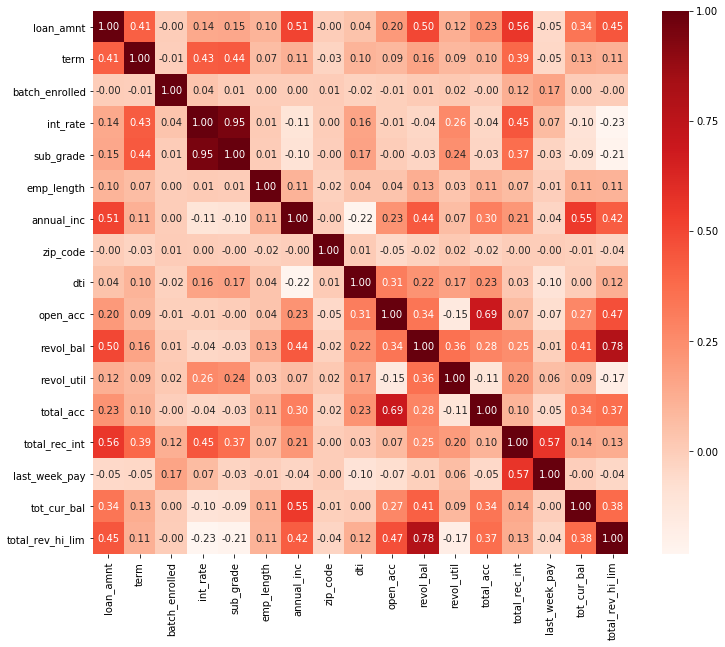

In [13]:
#Seperating X and Y variables:
X1 = df1.iloc[:,:-1]
Y = df1.iloc[:,-1]

#Checking for mulicolinearity in all numeric independent variables:
plt.figure(figsize=(12,10))
sb.heatmap(X1.corr(), annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()
#"int rate" and "sub-grade" are highly correlated.
#but they both are totally different, it will be business call whether to to keep both or remove which one of them.

In [14]:
#Getting all categorical variables:
X2 = df.select_dtypes(include=["object"])
#"addr_state" is same as "zip_code" and "pymnt_plan" have all observation same 
X2 = X2.drop(["addr_state","pymnt_plan"],axis=1)
'''label encoding'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lab = LabelEncoder()
X2 = X2.apply(LabelEncoder().fit_transform)
'''one hot encoding'''
onehot = OneHotEncoder(categorical_features=[0,2])
X2 = onehot.fit_transform(X2).toarray()
'''dummy variable trap'''
X2 = np.delete(X2,[0,8], axis=1)

#Combining numerical and categorical columns:
X = np.concatenate((X1,X2),axis=1)
del df1,X1,X2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [15]:
'''3.Missing Value Treatment'''
#Checking missing values in each column:
print(pd.DataFrame(X).isnull().sum())  #or print(X.isna().sum())

0         0
1         0
2     47935
3         0
4         0
5      6708
6         1
7         0
8         0
9         2
10        0
11       63
12        2
13        0
14     2621
15    10593
16    10593
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
dtype: int64


In [16]:
#Checking for skewness:
skewness = pd.DataFrame(X).skew()
print(skewness)
#Replacing missing values using imputer:
from sklearn.preprocessing import Imputer

#Columns 5,11 have no skewness, so we will use mean as imputer:
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
X[:,[5,11]] = imputer.fit_transform(X[:,[5,11]])

#Columns 14,15,16 are having skewness, so we will use median as imputer:
imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
X[:,[14,15,16]] = imputer.fit_transform(X[:,[14,15,16]])
#From column 17 onwards all are categorical variables, so filling all remaining columns with 0:
pd.DataFrame(X).fillna(0,inplace=True)

0       0.688638
1       0.876754
2       0.321342
3       0.422738
4       0.571690
5      -0.239401
6       0.886740
7       0.055426
8       0.847837
9       0.627281
10      1.002412
11     -0.159788
12      0.586691
13      1.108251
14      0.840476
15      1.113154
16      1.008125
17      0.001217
18    148.936228
19     67.727396
20      2.708314
21      0.398739
22      9.793016
23      1.271119
24     42.376695
25      3.781733
26     15.967747
27      6.926825
28     10.090619
29     12.982269
30      4.206857
31     42.962198
32      8.979078
33     13.534148
34     19.652304
35     -0.868908
36      0.060416
37     40.009193
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
#Final check for missing values after doing MVT:
print(pd.DataFrame(X).isna().sum())
print('MVT Done')

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
dtype: int64
MVT Done


In [18]:
'''4.Checking for duplicates'''
X = pd.DataFrame(X)
X_duplicate = pd.DataFrame(X)[X.duplicated()]
print(X_duplicate.head())
print("No duplicates found")

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Index: []

[0 rows x 38 columns]
No duplicates found


In [31]:
#Using Chi-square method for feature selection:
'''Applied SelectKBest class to extract top 10 best features. Chi Square is the scoring algorithm that is being used.
k=10 basically means that we are interested in top 10 features thet explain or dependent on Y'''

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Creating the object from the SelectKBest class:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)

#Column level scores are listed using chi sq algo which gives column index and chi square score (from 0 to Infinity)
dfscores = pd.DataFrame(fit.scores_)
'''
#To get the column names and their index
dfcolumns = pd.DataFrame(X.columns)
#Concat these two dataframes for better visualization and clarity, both are concatenated vertically
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#Renaming the dataframe columns for clarity, calling them as variable name and score
featureScores.columns = ['Variable_Name','Score']  

#nlargest() gives the top highest rows from a data frame
top_10=featureScores.nlargest(10,'Score')
print(top_10)'''

dfscores.columns = ['Score']
dfscores.sort_values('Score',ascending=False)

#top_10=dfscores.nlargest(10,'Score')
#print(top_10)

,Score
2,5.734745e+08
15,1.732253e+07
0,6.022650e+06
16,5.306010e+06
10,4.233219e+06
13,6.608717e+05
14,2.921597e+05
6,2.758679e+05
7,1.483575e+04
8,9.319072e+03


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[4.57636779e-02 1.65927733e-02 6.54621464e-02 5.63492315e-02
 3.46390669e-02 4.05808235e-02 4.50825722e-02 4.64558541e-02
 5.16122366e-02 4.44418025e-02 4.69145706e-02 4.60672470e-02
 4.63084445e-02 5.03373346e-02 1.06422725e-01 6.24368293e-02
 6.46033577e-02 9.00430882e-03 2.15113443e-05 1.54368148e-04
 6.49015606e-03 9.39310726e-03 2.53090476e-03 1.13325124e-02
 3.82754192e-04 8.00710726e-03 1.79763931e-03 4.40741009e-03
 2.61248954e-03 1.69407596e-03 7.35114289e-03 3.01931734e-04
 2.69595166e-03 1.76032637e-03 2.13376786e-03 1.23262134e-02
 4.54744715e-02 5.71557185e-05]


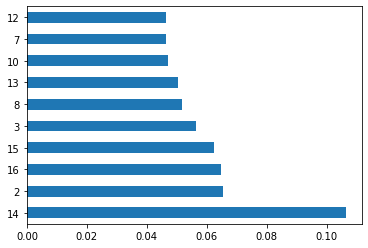

In [56]:
'''5.Feature Selection'''
#####1.using Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(random_state=0)
model.fit(X,Y)
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [58]:
'''best 10 significant variables using ExtraTreeClassifier:
last_week_pay, tot_cur_bal, batch_enrolled, int_rate, total_rev_hi_lim, total_rec_int, dti, annual_inc, revol_util, total_acc'''
X_n = X.iloc[:,[2,3,7,8,10,12,13,14,15,16]].values
#Therefore we will take these 10 variables in our model.

In [2]:
######2. Using Pearson Correlation
'''plt.figure(figsize=(12,10))
cor = df.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor_target = abs(cor["loan_status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features'''
#best 8 significant variables using correlation method:
#loan_amnt, term, batch_enrolled, sub_grade, dti, open_acc, total_rec_int, last_week_pay'''

In [59]:
'''split train & test data'''
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size=0.20, random_state=0)

In [60]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
''' Import the classifiers'''
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
''' Instantiate the classfiers and make a list'''
classifiers = [LogisticRegression(random_state=1234),  
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


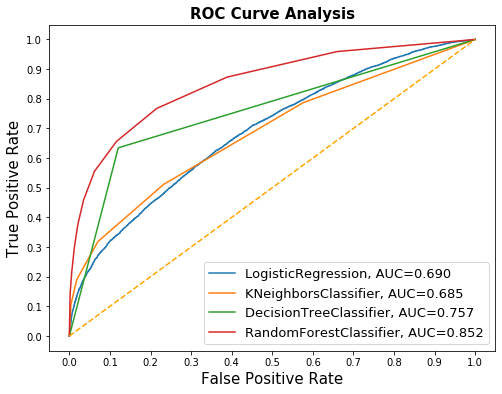

In [62]:
#Using AUC & ROC curve to find which model is best:
''' Define a result table as a DataFrame'''
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
''' Train the models and record the results'''
for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(Y_test,  yproba)
    auc = roc_auc_score(Y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

''' Set name of the classifiers as index labels'''
result_table.set_index('classifiers', inplace=True)

'''Plot the figure'''
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()
#Best AUC is 85.2% for Random forest, followed by Decision Tree with 75.7%

In [63]:
'''Now using Random Forest algorithm for our model'''
classi = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)
classi.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
#Finding number of tress and minimum sample leaf
'''params= {"n_estimators":[5,10,25,50,100,150,200,300],
         "min_samples_leaf":[i for i in range(1,6)]}
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(classi, params, cv=3)
result=model.fit(X_train,Y_train)
print(result.best_params_)'''
#Girdsearch gives: {'min_samples_leaf': 2, 'n_estimators': 200}

In [66]:
'''Now using random forest with n_estimators=200 and min_samples_leaf=2'''
classifier = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, oob_score=True, random_state=0)
classifier.fit(X_train,Y_train)
Y_predict = classifier.predict(X_test)
score = classifier.score(X_test, Y_test)

Text(0.5, 15.0, 'Predicted label')

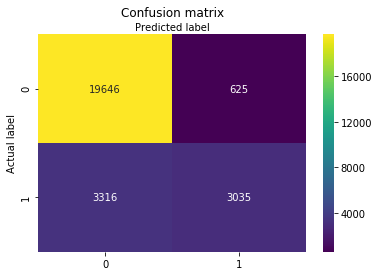

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)

'''The Confusion matrix in the heatmap form for all combinations'''
fig, ax = plt.subplots()
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis",fmt='2g' )
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("accuracy:", (TP+TN)/(TP+TN+FP+FN))
print("error rate:", (FP+FN)/(TP+TN+FP+FN))
print("sensitivity:", (TP)/(TP+FN))
print("specificity:", (TN)/(TN+FP))
print("precision:", (TP)/(TP+FP))

#Getting accuracy of 85.19% using random forest

accuracy: 0.8519645406055142
error rate: 0.14803545939448576
sensitivity: 0.4778774996063612
specificity: 0.969167776626708
precision: 0.8292349726775956


In [69]:
from sklearn.metrics import classification_report
classi_report = classification_report(Y_test, Y_predict)
print("Classification Report:")
print(classi_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     20271
           1       0.83      0.48      0.61      6351

    accuracy                           0.85     26622
   macro avg       0.84      0.72      0.76     26622
weighted avg       0.85      0.85      0.84     26622



In [70]:
#We can also cross-check accuracy directly using "accuracy_score" from sklearn library
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, Y_predict)
print("Accuracy Score is:",acc_score)

Accuracy Score is: 0.8519645406055142


In [71]:
#Model Evaluation using K-fold cross validation:
from sklearn.model_selection import cross_val_score
accuracy_k = cross_val_score(classifier, X_train, Y_train, scoring='accuracy', cv = 10)
print(accuracy_k)
#to get the mean of each fold :
print("Accuracy of Model with Cross Validation is:",accuracy_k.mean() * 100)

#Accuracy of model increases after using cross validation from 85.19% to 85.29% 

[0.85107981 0.84882629 0.85763921 0.85020661 0.85415101 0.85321187
 0.8514275  0.85349361 0.85396319 0.85509016]
Accuracy of Model with Cross Validation is: 85.29089270151997
